
##Описание проекта

Компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки.  Важно понять предпочтения пользователей, покупающих билеты на те или иные направления. 

Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.
**Описание данных**
База данных об авиаперевозках:
Таблица airports — информация об аэропортах:
- airport_code — трёхбуквенный код аэропорта,
- airport_name — название аэропорта,
- city — город,
- timezone — часовой пояс.

Таблица aircrafts — информация о самолётах:
- aircraft_code — код модели самолёта,
- model — модель самолёта,
- range — дальность полётов.

Таблица tickets — информация о билетах:
- ticket_no — уникальный номер билета,
- passenger_id — уникальный идентификатор пассажира,
- passenger_name — имя и фамилия пассажира.

Таблица flights — информация о рейсах:
- flight_id — уникальный идентификатор рейса,
- departure_airport — аэропорт вылета,
- departure_time — дата и время вылета,
- arrival_airport — аэропорт прилёта,
- arrival_time — дата и время прилёта,
- aircraft_code — уникальный идентификатор самолёта.

Таблица ticket_flights — стыковая таблица «рейсы-билеты»:
- ticket_no — номер билета,
- flight_id — уникальный идентификатор рейса.

Таблица festivals — информация о фестивалях:
- festival_id — уникальный номер фестиваля,
- festival_date — дата проведения фестиваля,
- festival_city — город проведения фестиваля,
- festival_name — название фестиваля.



**Схема данных**

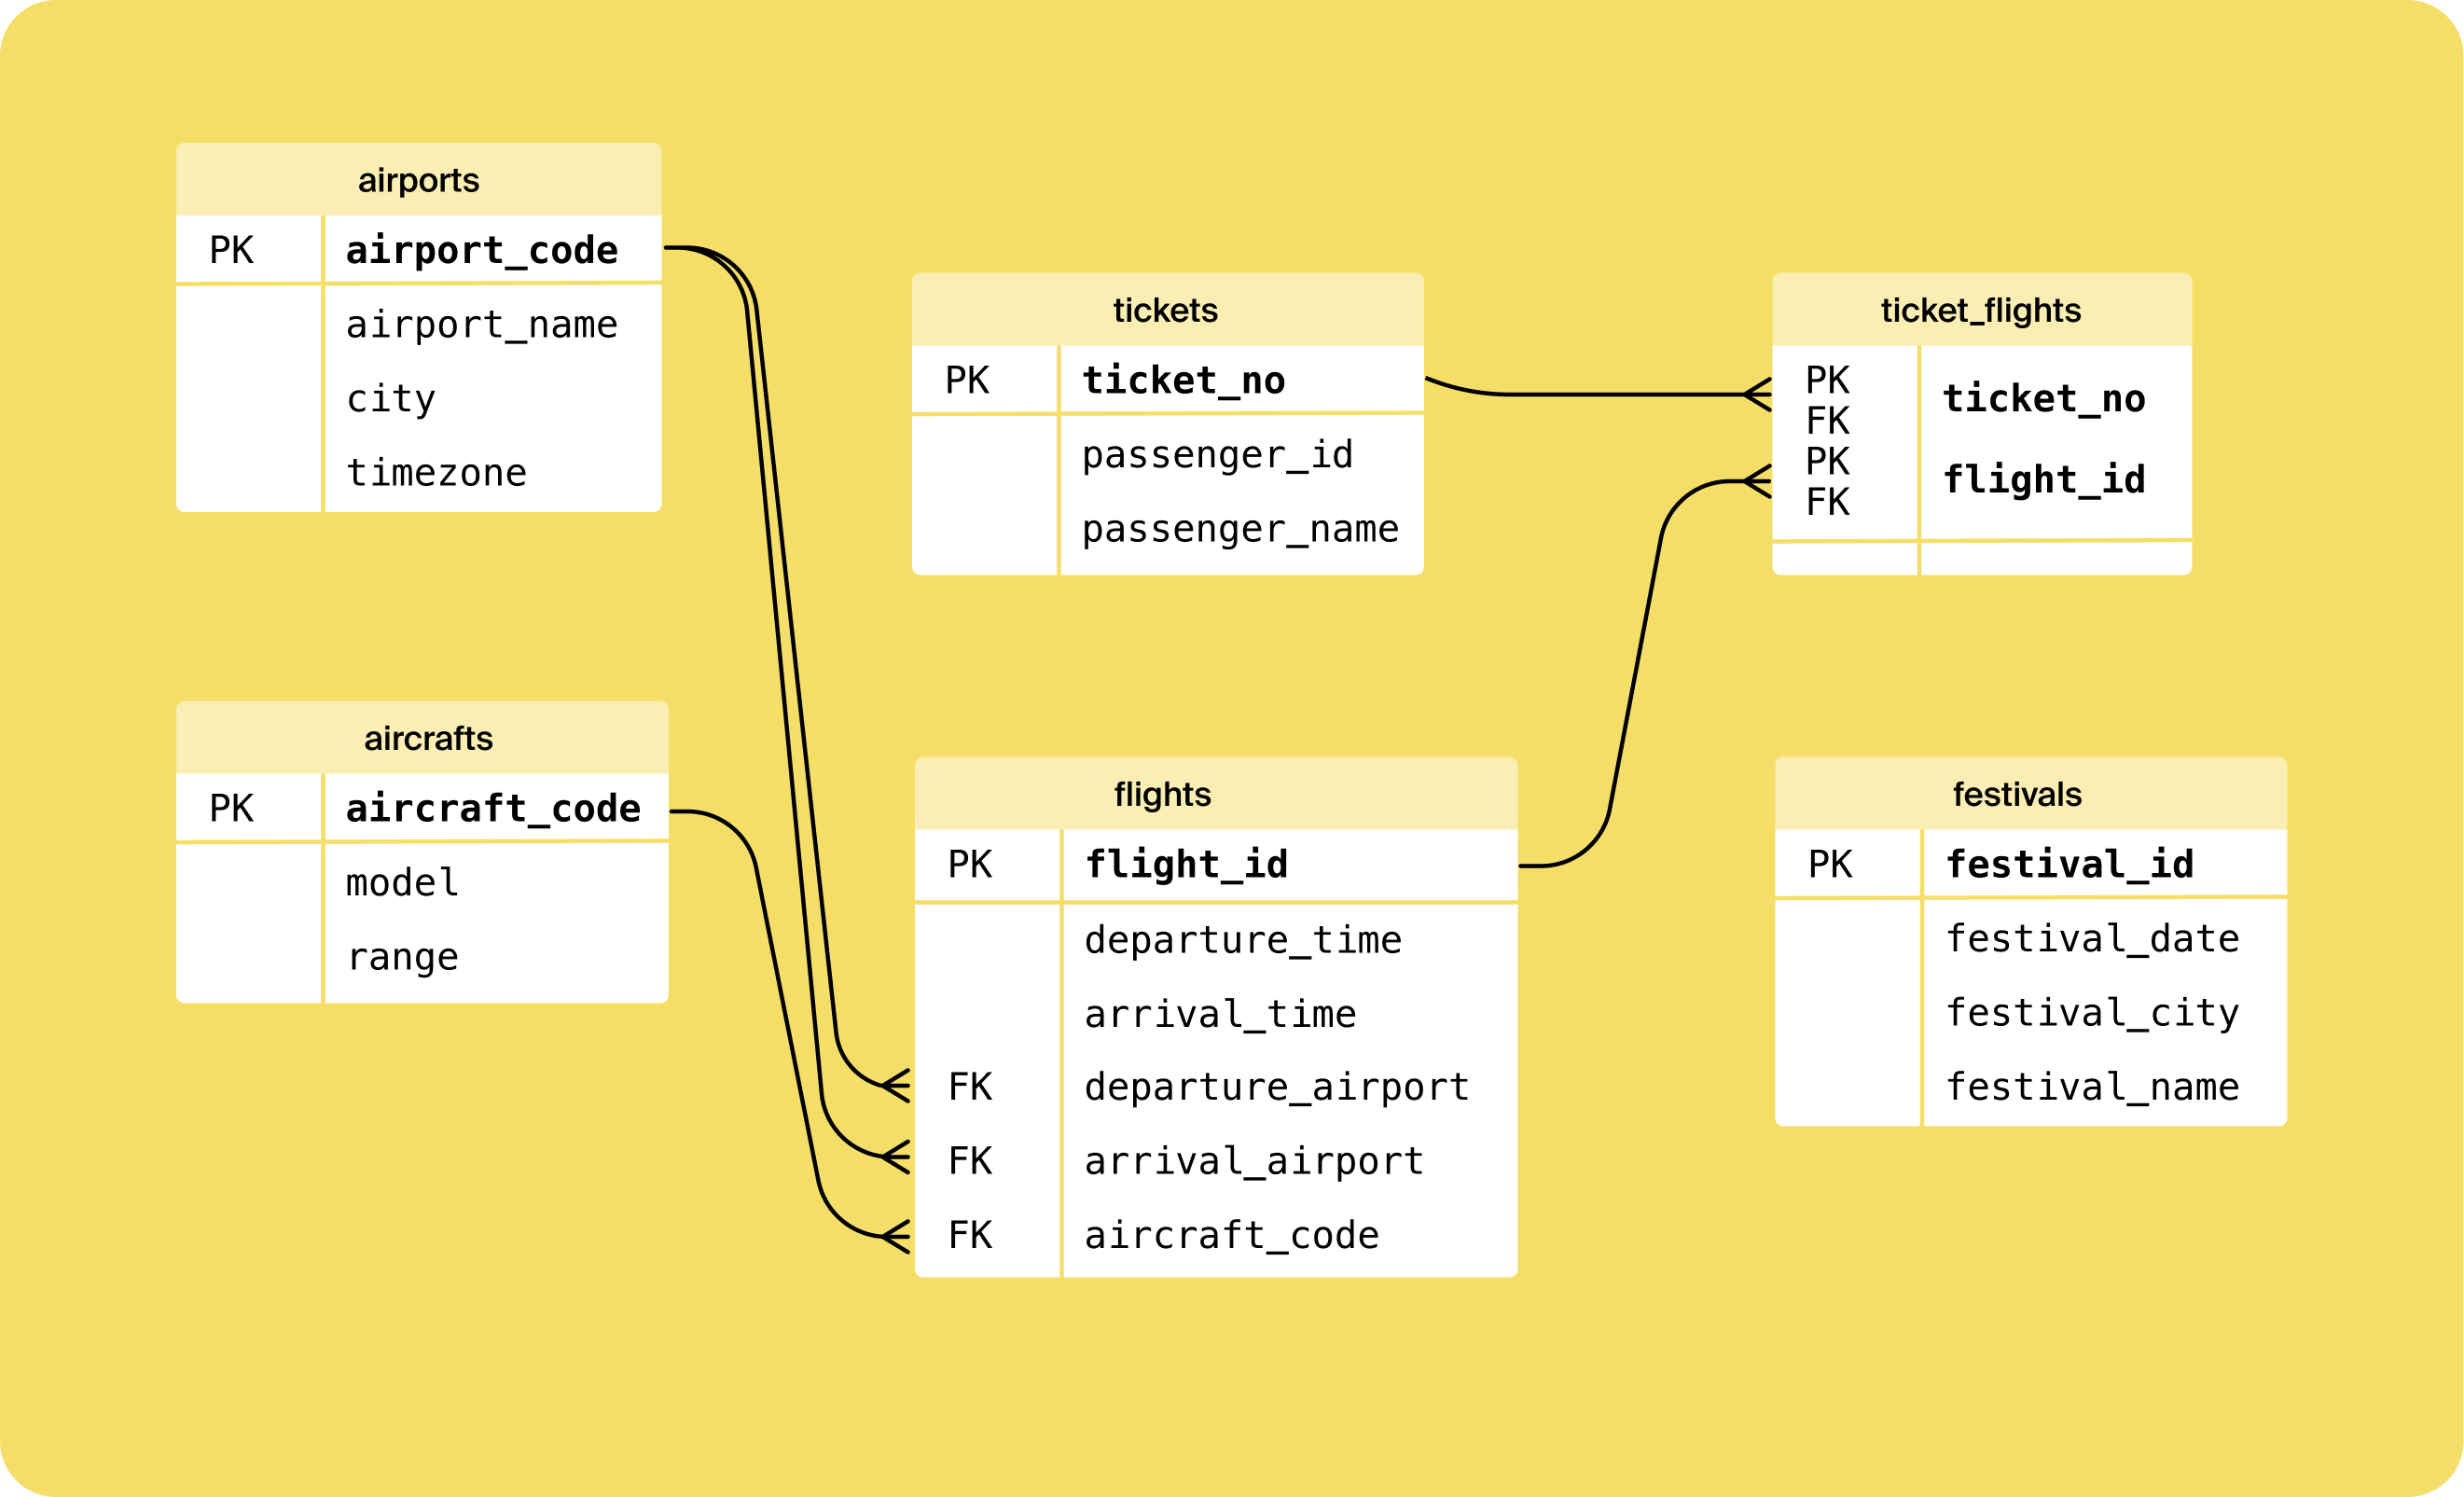

# Анализ полученных данных средствами Python


Получены файлы, в которых содержатся результаты запросов из предыдущих этапов проекта.

/datasets/query_1.csv — результат первого запроса. 
В нём содержится информация о:
- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. 

В нём содержится информация о:

- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

## Изучение данных

Для начала импортируем необходимые бибилиотеки

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

Посмотрим на общую информацию нашего первого дата-сета

In [ ]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [ ]:
query_1['flights_amount'] = query_1['flights_amount'].astype('float16') #меняем тип данных на float

Типы данных в порядке

In [ ]:
query_1.head() #посмотрим на первые 5 строк

model  flights_amount
0  Airbus A319-100           607.0
1  Airbus A321-200           960.0
2   Boeing 737-300           630.0
3   Boeing 767-300           600.0
4   Boeing 777-300           300.0

Прочитаем набор данных query_3, содержащий информацию о количестве рейсов и городах

In [ ]:
query_3 = pd.read_csv('/datasets/query_3.csv')
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
query_3.head() #посмотрим на таблицу query_3

city  average_flights
0       Абакан         3.870968
1      Анадырь         1.000000
2        Анапа         2.161290
3  Архангельск         5.354839
4    Астрахань         2.451613

In [ ]:
query_3['average_flights'] = query_3['average_flights'].astype('float') #меняем тип данных на float16

In [ ]:
query_3.describe()

average_flights
count       101.000000
mean          5.494189
std          13.119790
min           1.000000
25%           2.000000
50%           3.000000
75%           5.870968
max         129.774194

Выберем топ-10 городов по количеству рейсов

In [ ]:
top10_cities=query_3.sort_values(by='average_flights', ascending=False).head(10)
top10_cities

city  average_flights
43           Москва       129.774194
70  Санкт-Петербург        31.161290
54      Новосибирск        17.322581
33       Красноярск        11.580645
20     Екатеринбург        11.322581
67   Ростов-на-Дону        10.193548
63            Пермь        10.129032
10           Брянск        10.000000
74             Сочи         9.612903
84        Ульяновск         9.580645

## Построение графиков и анализ зависимостей

Построим графики зависимостей 1) модели самолетов и количества рейсов, 2) города и количества рейсов, 3) топ-10 городов и количества рейсов

### Количество рейсов в зависимости от модели самолета

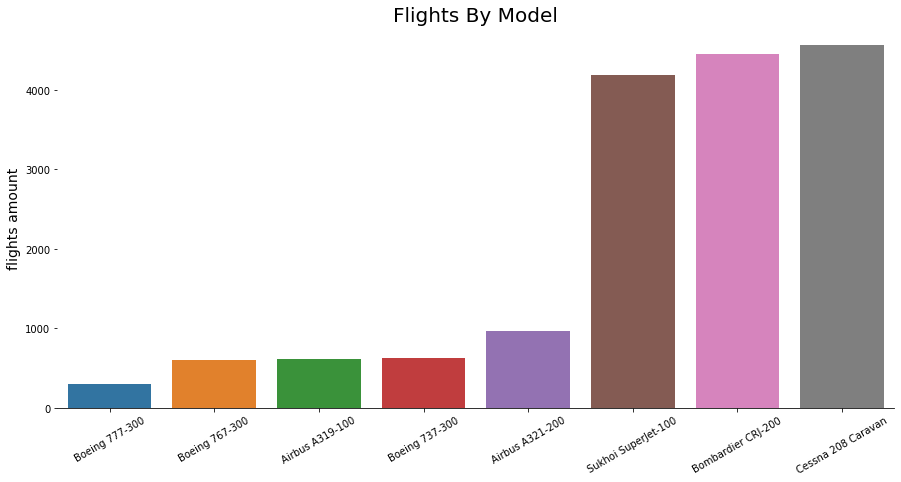

In [ ]:
flights_by_model = query_1.sort_values(by='flights_amount') #поместим набор данных в переменную flights_by_model
plt.figure(figsize=(15, 7))                                 #установи мразмеры нашего графика
plt.title('Flights By Model', fontsize=20)                  #добавим название и размер шрифта

sns.barplot(x='model', y='flights_amount', data=flights_by_model, label="line") #установим оси графика
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('flights amount', fontsize=14)                   #дадим название оси Y
plt.xticks(rotation=30)                                     #развернем названия моделей по оси X н 30 градусов

plt.show()

####  Вывод

Самолеты моделей Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100 совершают значительно большее количество полетов по сравнению с другими моделями. Эти самолеты меньше по габаритам, чем аэробусы и боинги моделей 777 и 737 и их могут запускать на короткие направления, возможно поэтому они совершают количество перелетов в несколько раз превышающее количество перелетов других моделей. Меньше всего перелетов у крупнейшего Boeing 777-300.

### Количество рейсов в зависимости от города

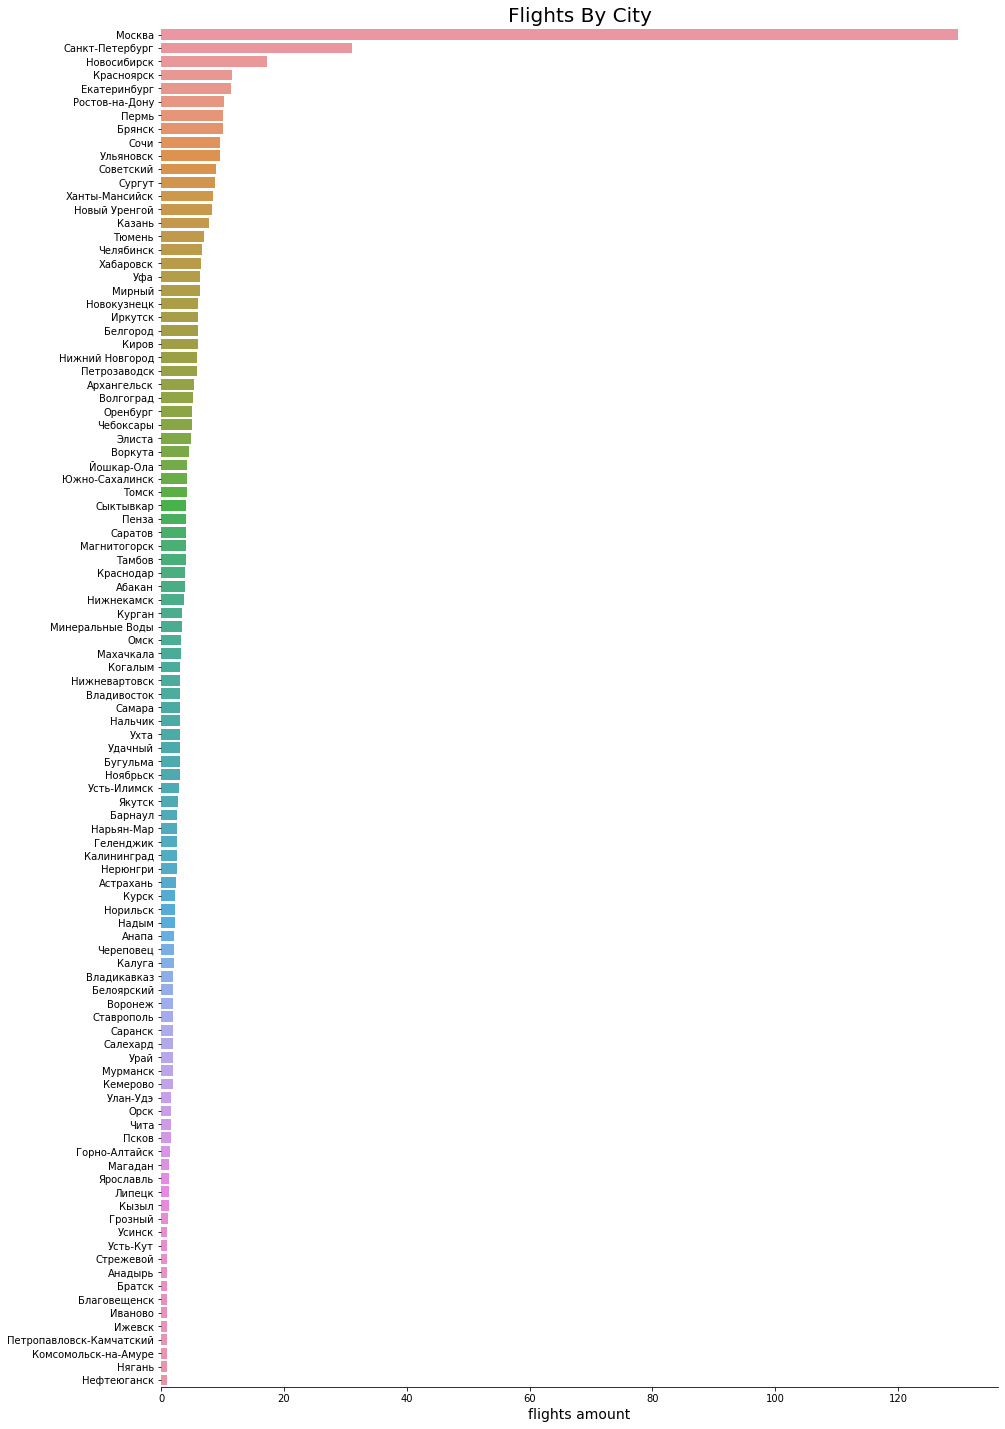

In [ ]:
flights_by_city = query_3.sort_values(by='average_flights', ascending=False)

plt.figure(figsize=(15, 25))
plt.title('Flights By City', fontsize=20)
sns.barplot(x='average_flights', y='city', data=flights_by_city)
sns.despine(left=True)
plt.ylabel('')
plt.xlabel('flights amount', fontsize=14)
plt.show()

#### Вывод
По городам лидирует Москва и Санкт-Петербург, Новосибирск и Екатеринбург, в остальных городах перелетов мало, в среднем не больше 5. Вполне возможно, что лидирующая позиция Москвы обоснована тем, что в некоторые города нет прямых путей сообщения и транспортная развязка осуществляется через Москву. 

### Топ-10 городов по количеству рейсов

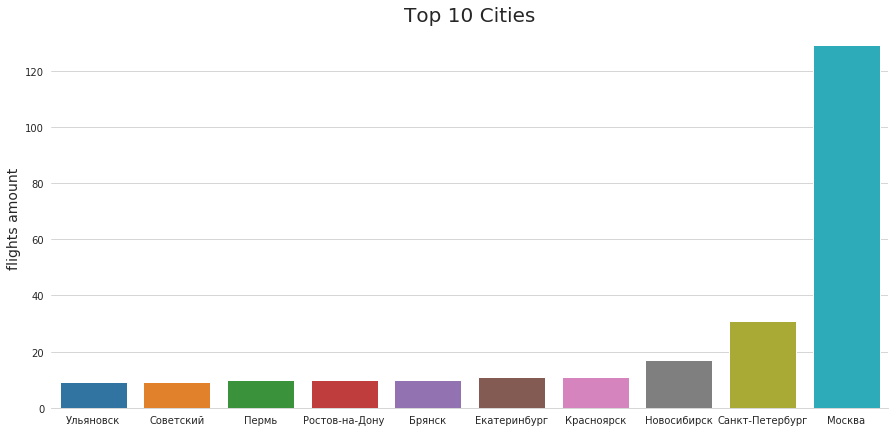

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))
plt.title('Top 10 Cities', fontsize=20)
sns.barplot(x='city', y='average_flights', data=top10_cities.sort_values(by='average_flights', ascending=True))
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('flights amount', fontsize=14)
plt.show()

#### Вывод
Тройка лидеров - Москва, Санкт-Петербург, Новосибирск. В остальных городах попавших в ТОП-10 всего около 10 перелетов

## Общий Вывод

Основная масса перелетов осуществляется на небольших самолетах моделей Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100  в Москву, Санкт-Петербург, Новосибирск, Екатеринбург, в остальных городах перелетов мало, в среднем около 10 перелетов. Вполне возможно, что лидирующая позиция Москвы обоснована тем, что в некоторые города нет прямых путей сообщения и транспортная развязка осуществляется через Москву.